In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [3]:
data = pd.read_excel('EastWestAirlines.xlsx')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In Clustering we have three type clusters.
 * K-Means
 * hierarchical
 * DBSCAN

Preprocess the dataset 
------------------------

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data1 = data.drop(['ID#','cc3_miles','cc2_miles','Qual_miles'], axis=1)
data1

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,174,1,0,0,7000,0
1,19244,1,215,2,0,0,6968,0
2,41354,1,4123,4,0,0,7034,0
3,14776,1,500,1,0,0,6952,0
4,97752,4,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...
3994,18476,1,8525,4,200,1,1403,1
3995,64385,1,981,5,0,0,1395,1
3996,73597,3,25447,8,0,0,1402,1
3997,54899,1,500,1,500,1,1401,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1d16df251d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d16e0e24d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d16df24690>],
 'medians': [<matplotlib.lines.Line2D at 0x1d16de8f350>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d16de8e190>],
 'means': []}

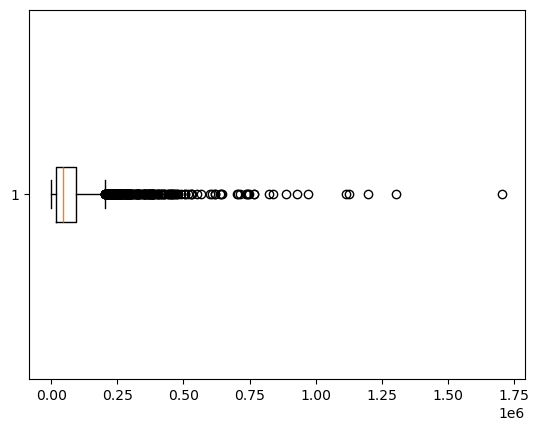

In [50]:
plt.boxplot(data1['Balance'], vert=False)

In [31]:
#Balance column is having more outliers let remove those values using IQR value.

In [5]:
# Function to identify outliers using IQR method
def find_outliers_IQR(dataframe):
    outliers_indices = set()
    
    for column in dataframe.columns:
        Q1 = data1[column].quantile(0.25)
        Q3 = data1[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers_in_column = data1[(data1[column] < lower_bound) | (data1[column] > upper_bound)].index
        outliers_indices.update(outliers_in_column)
    
    return list(outliers_indices)

# Identify outliers
outliers_indices = find_outliers_IQR(data1)

# Remove outliers
data2 = data1.drop(outliers_indices)
data2

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,174,1,0,0,7000,0
1,19244,1,215,2,0,0,6968,0
2,41354,1,4123,4,0,0,7034,0
3,14776,1,500,1,0,0,6952,0
5,16420,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...
3994,18476,1,8525,4,200,1,1403,1
3995,64385,1,981,5,0,0,1395,1
3996,73597,3,25447,8,0,0,1402,1
3997,54899,1,500,1,500,1,1401,0


In [6]:
# Reset index
data2.reset_index(drop=True, inplace=True)

In [7]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3016 non-null   int64
 1   cc1_miles          3016 non-null   int64
 2   Bonus_miles        3016 non-null   int64
 3   Bonus_trans        3016 non-null   int64
 4   Flight_miles_12mo  3016 non-null   int64
 5   Flight_trans_12    3016 non-null   int64
 6   Days_since_enroll  3016 non-null   int64
 7   Award?             3016 non-null   int64
dtypes: int64(8)
memory usage: 188.6 KB


In [91]:
data2.describe()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000,3016.000000
mean,47443.939324,1.824602,10998.550066,9.431034,59.150862,0.208554,3925.134284,0.285809
std,43041.821813,1.155593,13715.829370,7.722759,153.737758,0.498695,2043.914456,0.451874
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,15605.500000,1.000000,523.750000,2.000000,0.000000,0.000000,2155.750000,0.000000
50%,33818.500000,1.000000,4831.500000,9.000000,0.000000,0.000000,3811.500000,0.000000
75%,66285.000000,3.000000,17063.750000,15.000000,0.000000,0.000000,5548.750000,1.000000
max,202636.000000,5.000000,57404.000000,38.000000,767.000000,2.000000,8296.000000,1.000000


In [8]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    print(x)
    return x
data_norm = norm_func(data2)

       Balance  cc1_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
0     0.138672        0.0     0.003031     0.026316           0.000000   
1     0.094745        0.0     0.003745     0.052632           0.000000   
2     0.203884        0.0     0.071824     0.105263           0.000000   
3     0.072690        0.0     0.008710     0.026316           0.000000   
4     0.080805        0.0     0.000000     0.000000           0.000000   
...        ...        ...          ...          ...                ...   
3011  0.090954        0.0     0.148509     0.105263           0.260756   
3012  0.317569        0.0     0.017089     0.131579           0.000000   
3013  0.363041        0.5     0.443297     0.210526           0.000000   
3014  0.270744        0.0     0.008710     0.026316           0.651890   
3015  0.014641        0.0     0.000000     0.000000           0.000000   

      Flight_trans_12  Days_since_enroll  Award?  
0                 0.0           0.843742     0.0  
1        

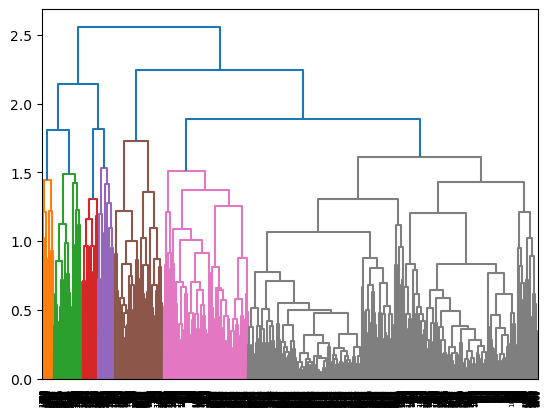

In [93]:
# Hierarchical
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

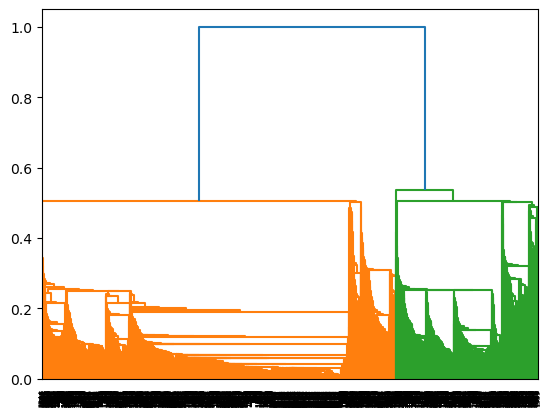

In [94]:
# Single linkage
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='single'))

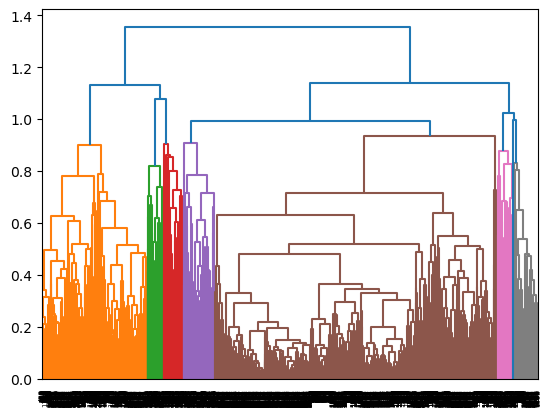

In [95]:
# Average linkage
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='average'))

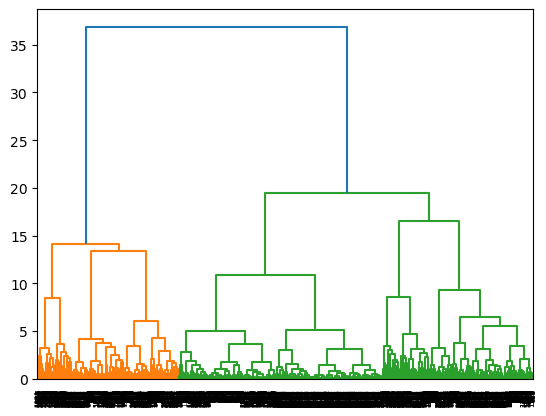

In [96]:
# Ward Linkage
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='ward'))

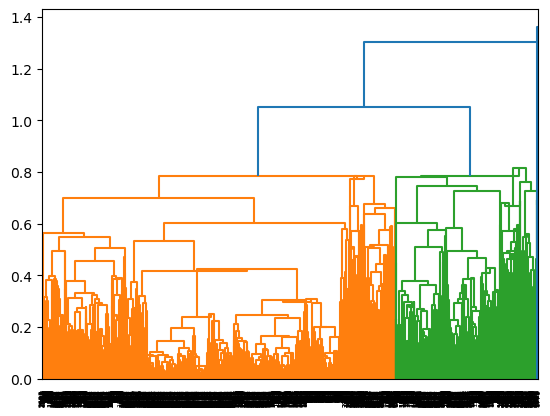

In [97]:
# Centroid Linkage
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='centroid'))

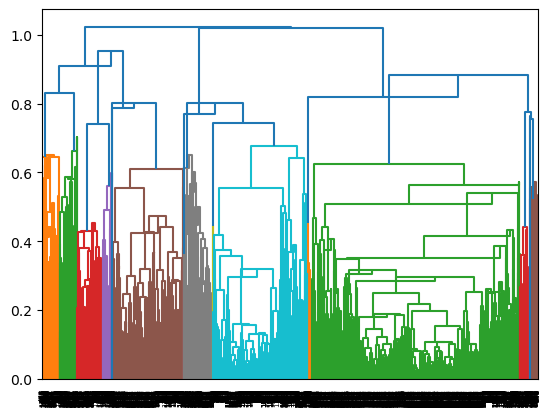

In [98]:
# Median Linkage
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='median'))

In [9]:
hc = AgglomerativeClustering(n_clusters=5, metric = 'euclidean', linkage = 'complete')

y_hc = hc.fit_predict(data_norm)
y_hc

array([3, 3, 3, ..., 4, 1, 3], dtype=int64)

In [10]:
set(y_hc)

{0, 1, 2, 3, 4}

In [11]:
data2['hierarchy_clusterid'] = y_hc

In [12]:
data2

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchy_clusterid
0,28143,1,174,1,0,0,7000,0,3
1,19244,1,215,2,0,0,6968,0,3
2,41354,1,4123,4,0,0,7034,0,3
3,14776,1,500,1,0,0,6952,0,3
4,16420,1,0,0,0,0,6942,0,3
...,...,...,...,...,...,...,...,...,...
3011,18476,1,8525,4,200,1,1403,1,4
3012,64385,1,981,5,0,0,1395,1,4
3013,73597,3,25447,8,0,0,1402,1,4
3014,54899,1,500,1,500,1,1401,0,1


[1791.707081888837, 1111.5495883295225, 874.9601568499728, 748.9361147674753, 627.707148411686, 559.3130215889754, 492.63570289985915, 460.1293503561958, 430.40982219907346, 404.6424742447678, 383.362812544138, 362.7340706786218, 344.7737347875078, 333.67110779721884, 323.0873407592818, 312.3201107616955, 306.101201667339, 293.8513465729919, 289.3990190570643]


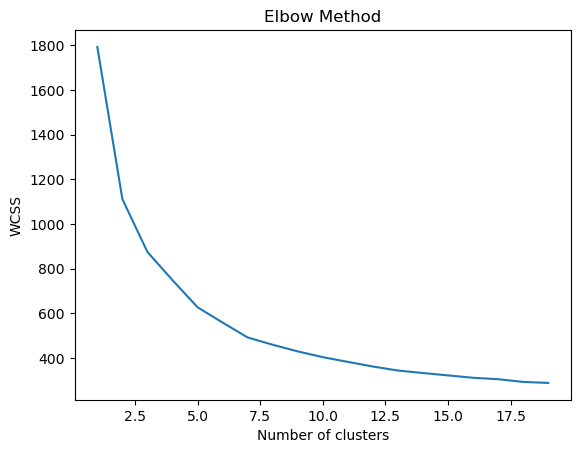

In [13]:
#K-Means

wcss = []
for i in range(1, 20):
    
    kmeans = KMeans(n_clusters=i,random_state=0 )
    kmeans.fit(data_norm)
    #kmeans.fit(Univ1)
    wcss.append(kmeans.inertia_)
print(wcss)    
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=0)
clusters_new.fit(data_norm)

KMeans(n_clusters=5, random_state=0)

In [15]:
set(clusters_new.labels_)

{0, 1, 2, 3, 4}

In [17]:
data2['K-means_clusterid'] = clusters_new.labels_

In [18]:
data2

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchy_clusterid,K-means_clusterid
0,28143,1,174,1,0,0,7000,0,3,2
1,19244,1,215,2,0,0,6968,0,3,2
2,41354,1,4123,4,0,0,7034,0,3,2
3,14776,1,500,1,0,0,6952,0,3,2
4,16420,1,0,0,0,0,6942,0,3,2
...,...,...,...,...,...,...,...,...,...,...
3011,18476,1,8525,4,200,1,1403,1,4,4
3012,64385,1,981,5,0,0,1395,1,4,4
3013,73597,3,25447,8,0,0,1402,1,4,1
3014,54899,1,500,1,500,1,1401,0,1,3


In [19]:
# Quality of clusters is expressed in terms of Silhoutte score

score_H =silhouette_score(data2, y_hc, metric='euclidean')
score_H

-0.01940254912412715

In [20]:
score_H =silhouette_score(data2, clusters_new.labels_, metric='euclidean')
score_H

0.03905746523477517

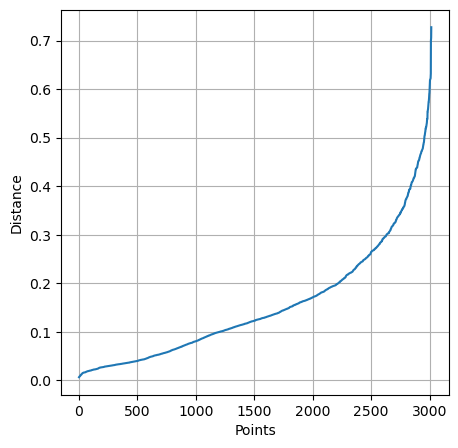

In [31]:
#DBSCAN

nearest_neighbors = NearestNeighbors(n_neighbors=7)
neighbors = nearest_neighbors.fit(data_norm)
distances, indices = neighbors.kneighbors(data_norm)
# print(distances.shape)
distances = np.sort(distances[:,6], axis=0)
# print(distances)
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.grid()

In [32]:
dbscan = DBSCAN(eps=3.5, min_samples=5)
clusters = dbscan.fit_predict(data_norm)

In [33]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
data2['cluster_dbscan']=dbscan.labels_
data2.head(50)

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,hierarchy_clusterid,K-means_clusterid,cluster_dbscan
0,28143,1,174,1,0,0,7000,0,3,2,0
1,19244,1,215,2,0,0,6968,0,3,2,0
2,41354,1,4123,4,0,0,7034,0,3,2,0
3,14776,1,500,1,0,0,6952,0,3,2,0
4,16420,1,0,0,0,0,6942,0,3,2,0
5,84914,3,27482,25,0,0,6994,0,3,0,0
6,20856,1,5250,4,250,1,6938,1,0,4,0
7,40091,2,7278,10,0,0,6959,0,3,2,0
8,43382,2,11150,20,0,0,6924,0,3,0,0
9,43097,1,3258,6,0,0,6918,0,3,2,0
